In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# 1. Data loading and preparation

In [3]:
# data source: https://snap.stanford.edu/data/facebook-large-page-page-network.html

nodes = pd.read_csv("musae_facebook_target.csv")
edges = pd.read_csv("musae_facebook_edges.csv")

In [4]:
nodes.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [5]:
with open("musae_facebook_features.json") as json_data:
    data = json.load(json_data)

col_names = []
for i in range(31):
    a = '{}{}'.format('f', i)
    col_names.append(a)

features = pd.DataFrame.from_dict(data=data, orient='index', columns=col_names)
features_subset = features.iloc[:, :10]

In [6]:
# impute null values with most_frequent values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features_tf = imputer.fit_transform(features_subset)
features_tf = pd.DataFrame(features_tf, columns=features_subset.columns)

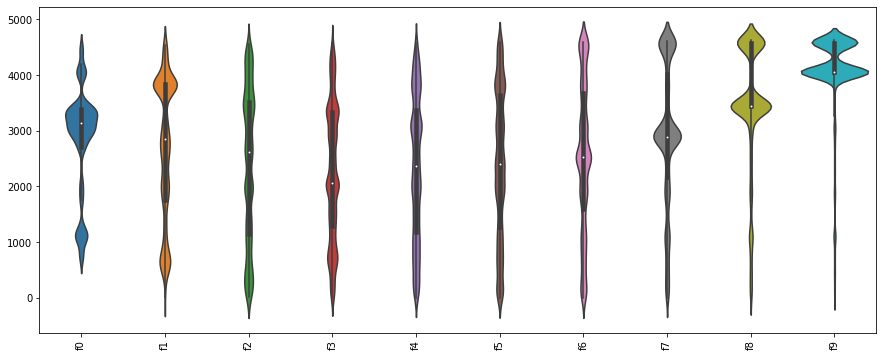

In [7]:
# check data distribution

plt.figure(figsize=(15,6))
ax = sns.violinplot(data=features_tf)
_ = ax.set_xticklabels(features_tf.columns, rotation=90)

In [8]:
# remove outliers

q25 = features_tf.quantile(0.25)
q75 = features_tf.quantile(0.75)
iqr = q75-q25

mask = (features_tf < (q25 - 1.5*iqr)) | (features_tf > (q75 + 1.5*iqr)) # set the cap
features_tf[mask] = np.nan # remove the cap from the dataframe
features_tf.dropna(inplace=True) # drop nan values

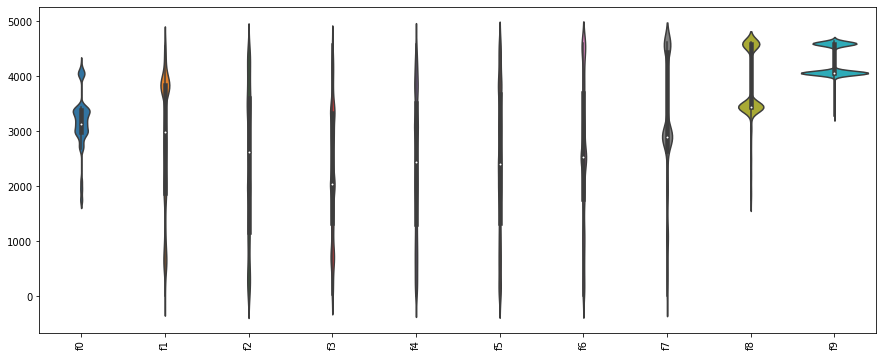

In [13]:
plt.figure(figsize=(15,6))
ax2 = sns.violinplot(data=features_tf)
_ = ax2.set_xticklabels(features_tf.columns, rotation=90)

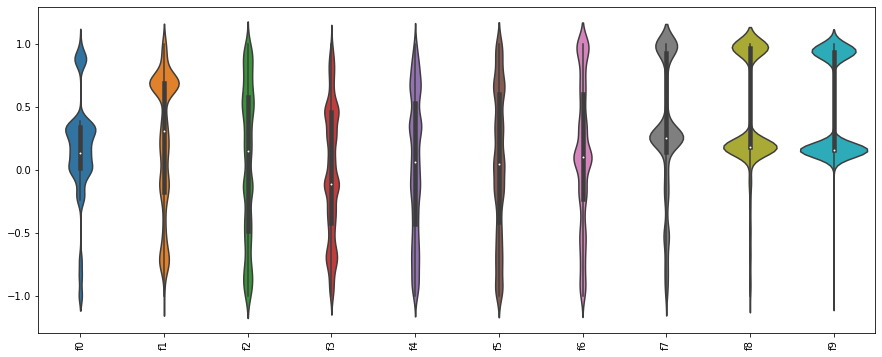

In [15]:
# normalize the data

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range=(-1,1))
features_scaled = mm.fit_transform(features_tf)

plt.figure(figsize=(15,6))
ax3 = sns.violinplot(data=features_scaled)
_ = ax3.set_xticklabels(features_subset.columns, rotation=90)

In [12]:
# 3. Graph Creation

In [17]:
import networkx as nx 

G = nx.Graph()

# add nodes

G.add_nodes_from(nodes.iloc[:,0])